<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Classifier_SVM_NonLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
!wget https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/gen_data.py

--2020-12-28 17:01:59--  https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/gen_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1494 (1.5K) [text/plain]
Saving to: ‘gen_data.py’

gen_data.py         100%[===================>]   1.46K  --.-KB/s    in 0s      

2020-12-28 17:01:59 (28.9 MB/s) - ‘gen_data.py’ saved [1494/1494]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from gen_data import make_binary

In [9]:
def plot_boundary(classifier, X, ax):
    eps          = X.std()/8
    x_min, x_max = X[:,0].min() - eps, X[:,0].max() + eps
    y_min, y_max = X[:,1].min() - eps, X[:,1].max() + eps
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Load Data

In [4]:
make_binary()

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [3]:
X, y = make_binary()

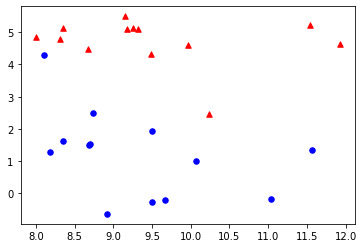

In [8]:
fig,ax = plt.subplots(1,1)
ax.scatter( X[y==0,0], X[y==0,1], c='b', s=30, marker='o')
ax.scatter( X[y==1,0], X[y==1,1], c='r', s=30, marker='^')
plt.show()

# Train Data

In [11]:
model = SVC(kernel='rbf',           # Radial basis function; 
            C=10,                   # lower C, simpler (higher regularization) to avoid overfitting
            gamma=0.1).fit(X,y)     # lower gamma, prediction considers wider range around each data point in classification to avoid overfitting

In [13]:
sv     = model.support_vectors_       
dcoef  = model.dual_coef_.ravel()   # coefficients for sv (shows feature importance)
clabel = dcoef > 0                  # sign which gives the class labels for sv

# Evaluation

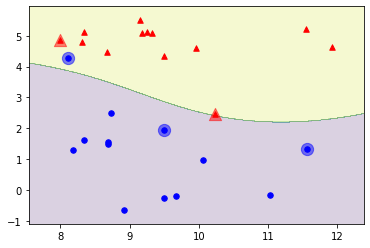

In [19]:
fig,ax = plt.subplots(1,1)
plot_boundary(model,X,ax)       # plot boundary and regions
ax.scatter( X[y==0,0], X[y==0,1], c='b', s=30, marker='o')
ax.scatter( X[y==1,0], X[y==1,1], c='r', s=30, marker='^')
ax.scatter( sv[~clabel, 0], sv[~clabel, 1], c='b', s=150, marker='o', alpha=0.5)    # larger marker for BLUE support vector 
ax.scatter( sv[ clabel, 0], sv[ clabel, 1], c='r', s=150, marker='^', alpha=0.5)    # larger marker for RED support vector 
plt.show()

# Nice result! Will need more data to define the empty spaces better.

# Extra: Experiment with C and gamma

In [20]:
def plot_sv_boundary(svm, X, ax):
    sv     = svm.support_vectors_
    dcoef  = svm.dual_coef_.ravel()
    clabel = dcoef > 0
    plot_boundary(svm, X,ax)
    ax.scatter( X[y==0,0], X[y==0,1], c='b', s=30, marker='o')
    ax.scatter( X[y==1,0], X[y==1,1], c='r', s=30, marker='^')
    ax.scatter( sv[~clabel, 0], sv[~clabel, 1], c='b', s=150, marker='o', alpha=0.5)
    ax.scatter( sv[ clabel, 0], sv[ clabel, 1], c='r', s=150, marker='^', alpha=0.5)

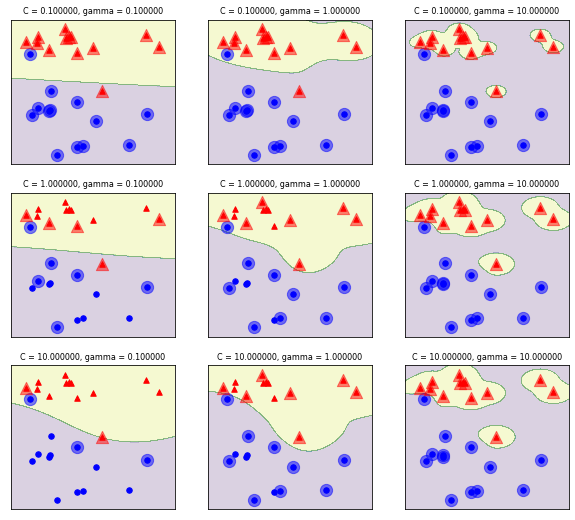

In [24]:
fig,axes = plt.subplots(3,3, figsize=(10,9))
gamma, C = np.meshgrid([0.1, 1.0 ,10.0 ], [0.1, 1.0, 10])      # Both gamma and C will be set to [0.1,1.0,10.0]. So 3x3 results
params   = zip( gamma.ravel(), C.ravel() )
for (g,c), ax in zip( params, axes.ravel()):
    model    = SVC(kernel='rbf', C=c, gamma=g).fit(X,y)
    plot_sv_boundary(model, X, ax)
    ax.set_title( 'C = %4f, gamma = %4f'%(c,g), fontsize=8)
    ax.set_xticks([]); ax.set_yticks([])

plt.show()

# Seems like c=10, gamma=1 is the best. Need test set to verify.